In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import uniform, norm


 2. Consideremos la función $𝑓 : R → R$ dada por $𝑓 (𝑥) = 2𝑥 −1$. Sean $𝑋 ∼ U(0,1),𝑍 ∼ N(0,.25)$ e $𝑌 := 𝑓 (𝑋) +𝑍$.
 
    (a) Fijemos 𝑛 = 100. Tomar muestras $𝑥1,...,𝑥𝑛$ de 𝑋 y $𝜀1,...,𝜀𝑛$ de 𝑍 y calcular $𝑦𝑖 = 𝑓 (𝑥𝑖) +𝑧𝑖$, con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de la forma $𝑌 = 𝑋𝛽1 + 𝛽0 + 𝜖$ a partir de los samples $(𝑥1,𝑦1), . . ., (𝑥𝑛,𝑦𝑛)$ generados. Hacer un diagrama de dispersión con los samples y la estimación del modelo de regresión lineal.  
    Lo que cambia con el 1.b es que no tenemos definido 𝜀
    


El estimador de b0 = -1.0020961328715328
El estimador de b1 = 1.9467998452720305


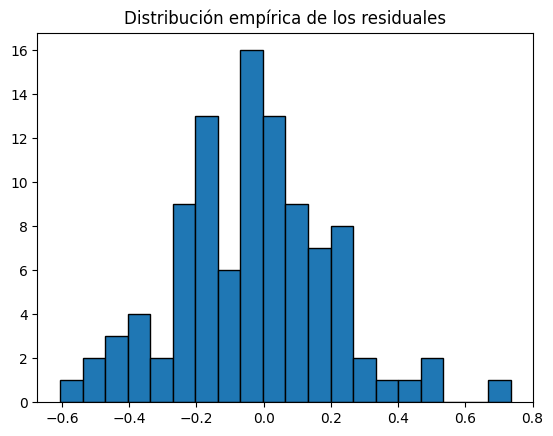

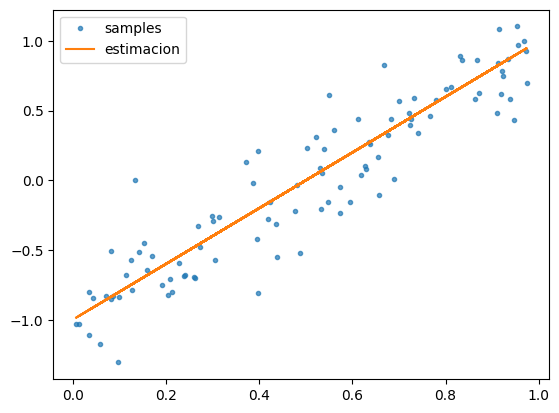

In [6]:
muestras_x = uniform.rvs(0,1,100)
muestras_z = norm.rvs(0,0.25,100)


muestras_y = 2*muestras_x - 1 + muestras_z

b1 = np.sum((muestras_x - np.mean(muestras_x))*(muestras_y - np.mean(muestras_y)))/np.sum((muestras_x - np.mean(muestras_x))**2)
b0 = np.mean(muestras_y) - b1 * np.mean(muestras_x)

print('El estimador de b0 =', b0)
print('El estimador de b1 =', b1)

# Graficar el histograma de los residuales
plt.hist(muestras_z, bins=20, edgecolor='black')
plt.title('Distribución empírica de los residuales')
plt.show()

# Plotear samples y estimación
fig, ax = plt.subplots()
ax.plot(muestras_x, muestras_y, '.', alpha=.7, label='samples')
ax.plot(muestras_x, 2*muestras_x -1 , label='estimacion')
plt.legend()
plt.show()


 (b) Repetir el paso anterior 𝑚 = 1000 veces para obtener 𝑚 pares de coeficientes $ \hat{\beta_0}$ y $\hat{\beta_1}$, es decir, 𝑚 samples de $ \hat{\beta_0}$ y 𝑚 samples de $ \hat{\beta_1}$. Visualizar la distribución de cada $ \hat{\beta_j}$ haciendo un histograma; visualizar la distribución conjunta haciendo un diagrama de dispersión con todas las estimaciones. Además, graficar todas las rectas de regresión estimadas.

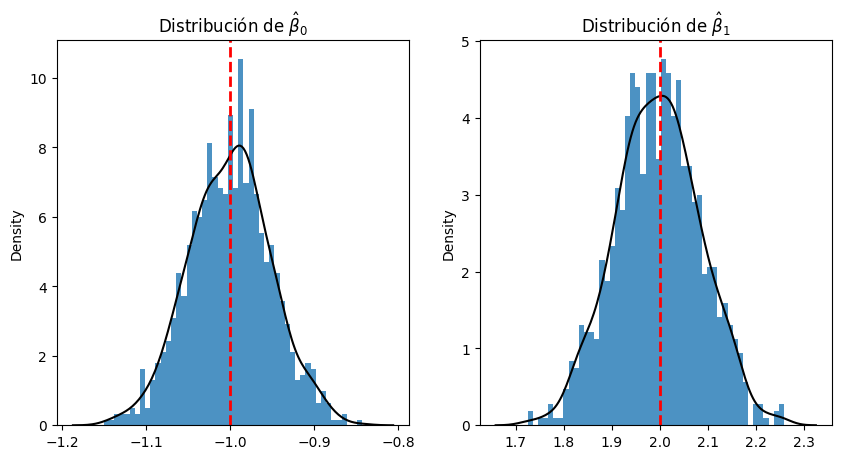

/tmp/ipykernel_2610/714999644.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


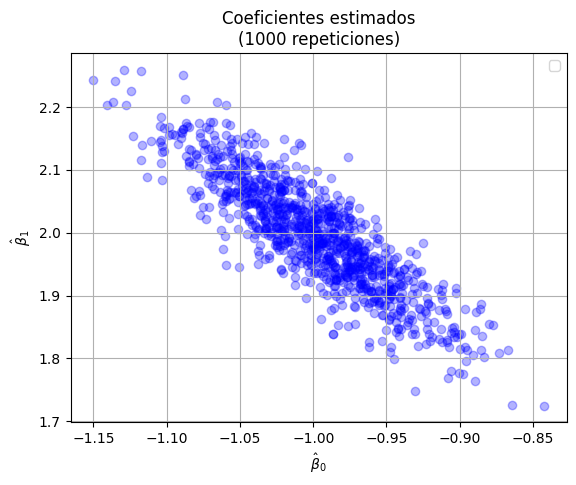

In [16]:
#repetir el proceso 1000 veces para obtener una distribución de los coeficientes  ˆ 𝛽0 y ˆ 𝛽1.
b0, b1 = [], []
for i in range(1000):
    muestras_x = uniform.rvs(0,1,100)
    muestras_z = norm.rvs(0,0.25,100)
    muestras_y = 2*muestras_x - 1 + muestras_z
    beta1=(np.sum((muestras_x - np.mean(muestras_x))*(muestras_y - np.mean(muestras_y)))/np.sum((muestras_x - np.mean(muestras_x))**2))
    beta0= (np.mean(muestras_y) - b1[i] * np.mean(muestras_x))
    b0.append(beta0)
    b1.append(beta1)

import seaborn as sns
# Plotear
bins = 50

fig, axs  = plt.subplots(1,2, figsize=(10,5))

axs[0].hist(b0, density=True, alpha=.8, bins = bins)
sns.kdeplot(b0, ax=axs[0], color='k')
axs[0].axvline(x=-1, color='r', linestyle='--', linewidth=2)
axs[0].set_title('Distribución de $\\hat\\beta_0$')

axs[1].hist(b1, density=True, alpha=.8, bins = bins)
sns.kdeplot(b1, ax=axs[1], color='k')
axs[1].axvline(x=2, color='r', linestyle='--', linewidth=2)
axs[1].set_title('Distribución de $\\hat\\beta_1$')
plt.show()

#visualizar la distribución conjunta de los coeficientes b0 y b1
plt.scatter(b0, b1, color='blue', alpha=.3 )
plt.title('Distribución conjunta de b0 y b1')
plt.xlabel('$\\hat{\\beta}_0$')
plt.ylabel('$\\hat{\\beta}_1$')
plt.title(f'Coeficientes estimados\n({1000} repeticiones)')
plt.legend()
plt.grid(True)
plt.show()



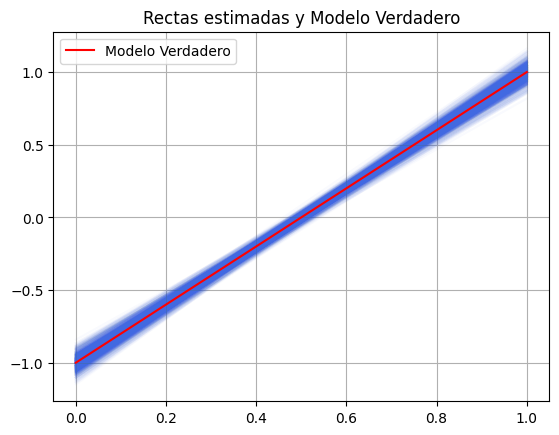

In [17]:
x_vals = np.linspace(0, 1, 100)
for i in range(1000):
    plt.plot(x_vals, b0[i] + b1[i] * x_vals, color='royalblue', alpha=0.03)

# Graficar el modelo verdadero
plt.plot(x_vals, -1 + 2 * x_vals, color='red', label='Modelo Verdadero')

# Personalizar el gráfico
plt.title('Rectas estimadas y Modelo Verdadero')
plt.legend()
plt.grid(True)
plt.show()

c) Repetir el paso anterior para 𝑚 = 100 desde 𝑛 = 10 hasta 𝑛 = 1000. Graficar la media y la varianza de cada coeficiente $\hat{\beta}$ en función de 𝑛.  
Acá copie el codigo del profe para tenerlo mano y poder modificarlo depende lo que pidan.

In [20]:
# 2.c

m = 30
ns = range(10, 1_001)
sigma = 0.25

# Instanciar listas para guardar estadísticos
sample_means = []
sample_variances = []
conditional_population_variances = []

# Generar samples del regresor
X = uniform.rvs(size=ns[-1])

true_betas = [-1, 2]

# Definir f(x)
def f(x):
    return true_betas[0] + true_betas[1]*x

# Crear estimadores del Modelo de Regresión Lineal Simple
def simple_linear_regression(x, y):
    """
    Estima un modelo de regresión lineal simple (MRLS) utilizando mínimos cuadrados ordinarios.

    Parámetros:
    - x: array de valores independientes.
    - y: array de valores dependientes.

    Devuelve:
    - beta_0: intercepto estimado.
    - beta_1: pendiente estimada.
    """
    # Calcular las medias de x e y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calcular el numerador y denominador para beta_1 (pendiente)
    numerador = np.sum((x - x_mean) * (y - y_mean))
    denominador = np.sum((x - x_mean)**2)

    # Estimación de beta_1 (pendiente)
    beta_1 = numerador / denominador

    # Estimación de beta_0 (intercepto)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1

# Iterar para cada tamaño de muestra
for n in ns:

  estimates = []

  # Filtrar la cantidad de samples necesaria
  X_sample = X[:n]

  # Realizar m estimaciones
  for i in range(m):

    # Simular variables
    epsilon = norm.rvs(loc=0, scale=sigma, size=n)
    Y_sample = f(X_sample)+ epsilon

    # Estimar
    beta_0, beta_1 = simple_linear_regression(X_sample, Y_sample)
    estimates.append((beta_0, beta_1))

  # Calcular promedio y varianza muestral de las estimaciones
  estimates_mean = np.mean(estimates, axis=0)
  estimates_var = np.var(estimates, axis=0)

  # Agregar a los resultados
  sample_means.append(estimates_mean)
  sample_variances.append(estimates_var)

  # Calcular varianza condicional teórica
  sxx = np.sum((X_sample - np.mean(X_sample))**2)
  x2bar = np.mean(X_sample**2)

  a11 = sigma**2 * x2bar / sxx
  a22 = sigma**2 / sxx

  conditional_population_variances.append((a11, a22))


# Convertir en np.array
sample_means = np.array(sample_means)
sample_variances = np.array(sample_variances)
conditional_population_variances = np.array(conditional_population_variances)



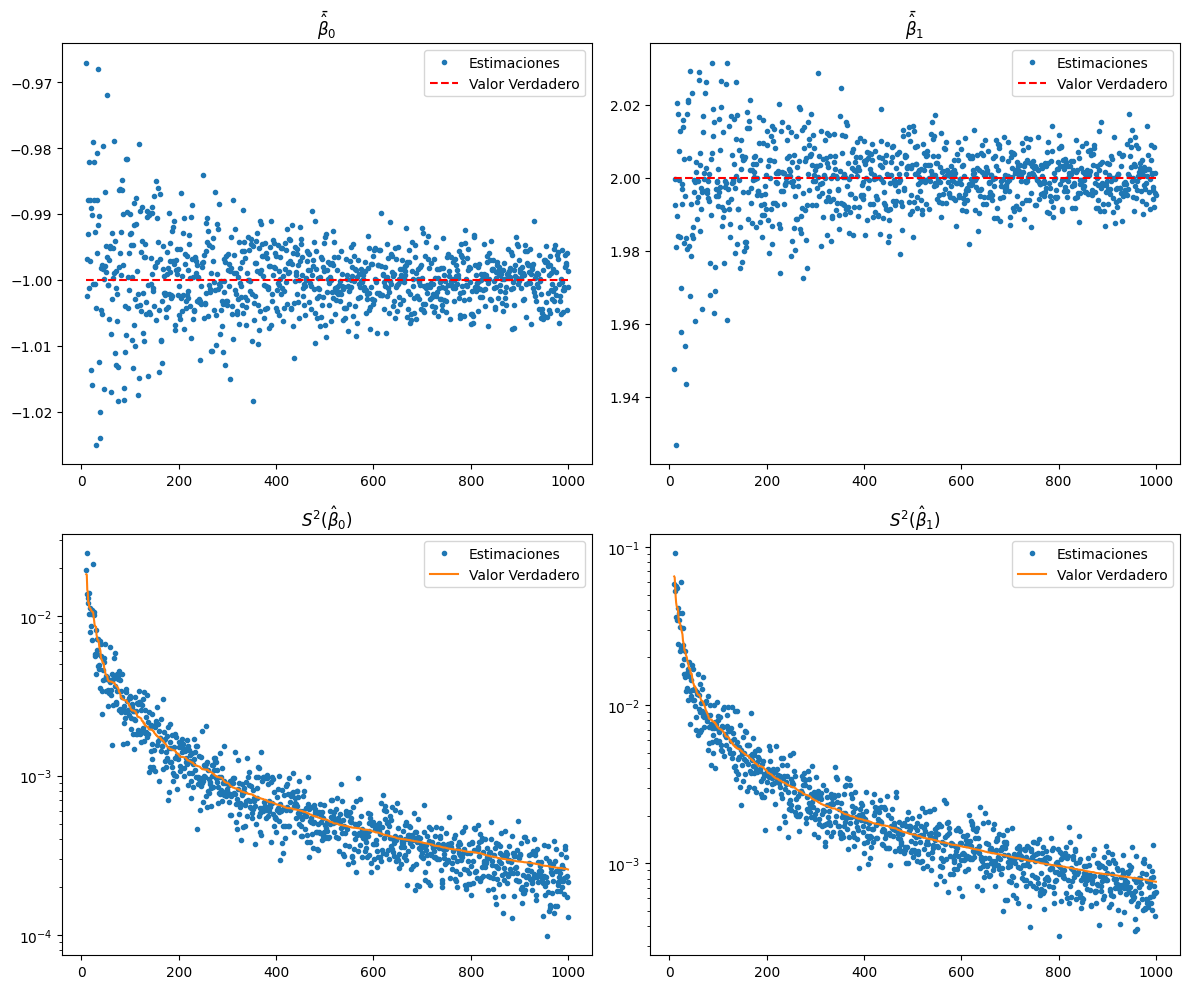

In [21]:
# Crear el gráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de las medias de las estimaciones para beta_0
axs[0, 0].plot(ns, sample_means[:, 0], '.', label='Estimaciones')
axs[0, 0].hlines(true_betas[0], xmin=ns[0], xmax=ns[-1], colors='r', linestyles='--', label='Valor Verdadero')
axs[0, 0].set_title(r'$\bar\hat{\beta}_0$')
axs[0, 0].legend()

# Gráfico de las medias de las estimaciones para beta_1
axs[0, 1].plot(ns, sample_means[:, 1], '.', label='Estimaciones')
axs[0, 1].hlines(true_betas[1], xmin=ns[0], xmax=ns[-1], colors='r', linestyles='--', label='Valor Verdadero')
axs[0, 1].set_title(r'$\bar\hat{\beta}_1$')
axs[0, 1].legend()

# Gráfico de la varianza (muestral) de las estimaciones para beta_0
axs[1, 0].plot(ns, sample_variances[:, 0], '.', label='Estimaciones')
axs[1, 0].plot(ns, conditional_population_variances[:, 0], label='Valor Verdadero')
axs[1, 0].set_title(r'$S^2(\hat{\beta}_0)$')
axs[1, 0].legend()
axs[1, 0].set_yscale('log') 

# Gráfico de la varianza (muestral) de las estimaciones para beta_1
axs[1, 1].plot(ns, sample_variances[:, 1], '.', label='Estimaciones')
axs[1, 1].plot(ns, conditional_population_variances[:, 1], label='Valor Verdadero')
axs[1, 1].set_title(r'$S^2(\hat{\beta}_1)$')
axs[1, 1].legend()
axs[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()